<center>
<h1> Introduction to Data Analytics</h1>
<h3>April 11, 2015 @ <a href="http://hackerspace.sg">HSG</a></h3>
<h3>Ivan &lt;vanzaj@gmail.com&gt;</h3>
</center>

- - - -

# Plan

1. Introduction & Setup
1. Hello Viz
1. NumPy arrays
1. Data generation
1. Pandas

- - - - 

# Data Science

- Computer Science
    - engineering (storage, file systems, databases, ...)
    - algorithms (signal processing, machine learning, optimization, AI, ...)
    
- Mathematics
    - numerical analysis (roots, series, integration, differential equations,...)
    - statistics (probability density, variance, correlation, hypothesis testing, baysian stats,...) 
    - abstract complex systems (chaos, dynamic systems,...)
    
- Linguistics
    - natural language processing
    
- Geology and Meteorology
    - natural complex systems (weather, earthquakes, global warming,...)
    
- Economics
    - operations research (optimization)
    - human complex systems (macro/micro econ models, game theory)
    
- Marketing (aka Business Intel)
    - trends and sentiment analysis
    - natural language processing
    
- [... every other discipline which needs to find answers...]

- Communication and Visual design

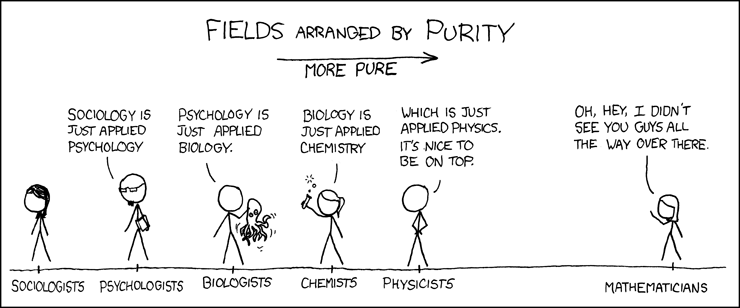

In [1]:
from IPython.display import HTML, Image

Image('http://imgs.xkcd.com/comics/purity.png')
# not sure where to place data scientists...

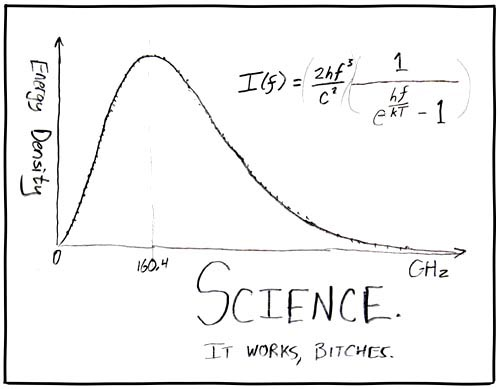

In [2]:
Image('http://imgs.xkcd.com/comics/science.jpg')
# http://www.explainxkcd.com/wiki/index.php?title=54:_Science 

## Brest cancer stats

<table>
<tr><td></td><td>Cancer (1%)</td><td>No cancer (99%)</td></tr>
<tr><td>Test +</td><td>80%</td><td>10%</td></tr>
<tr><td>Test -</td><td>20%</td><td>90%</td></tr>
</table>

What are the chances of actual cancer in case of a positive mammo test?

In [3]:
ir  = 1./100   # incidence rate
ptp = 8./10    # prob of true postitive test (sensitivity)
ptn = 9./10    # prob of true negative test (specificity)

odds = (ir * ptp) / ( ir * ptp + (1-ir) * (1-ptn))
print("Actual odds: %.2f%%" % (odds * 100))

Actual odds: 7.48%


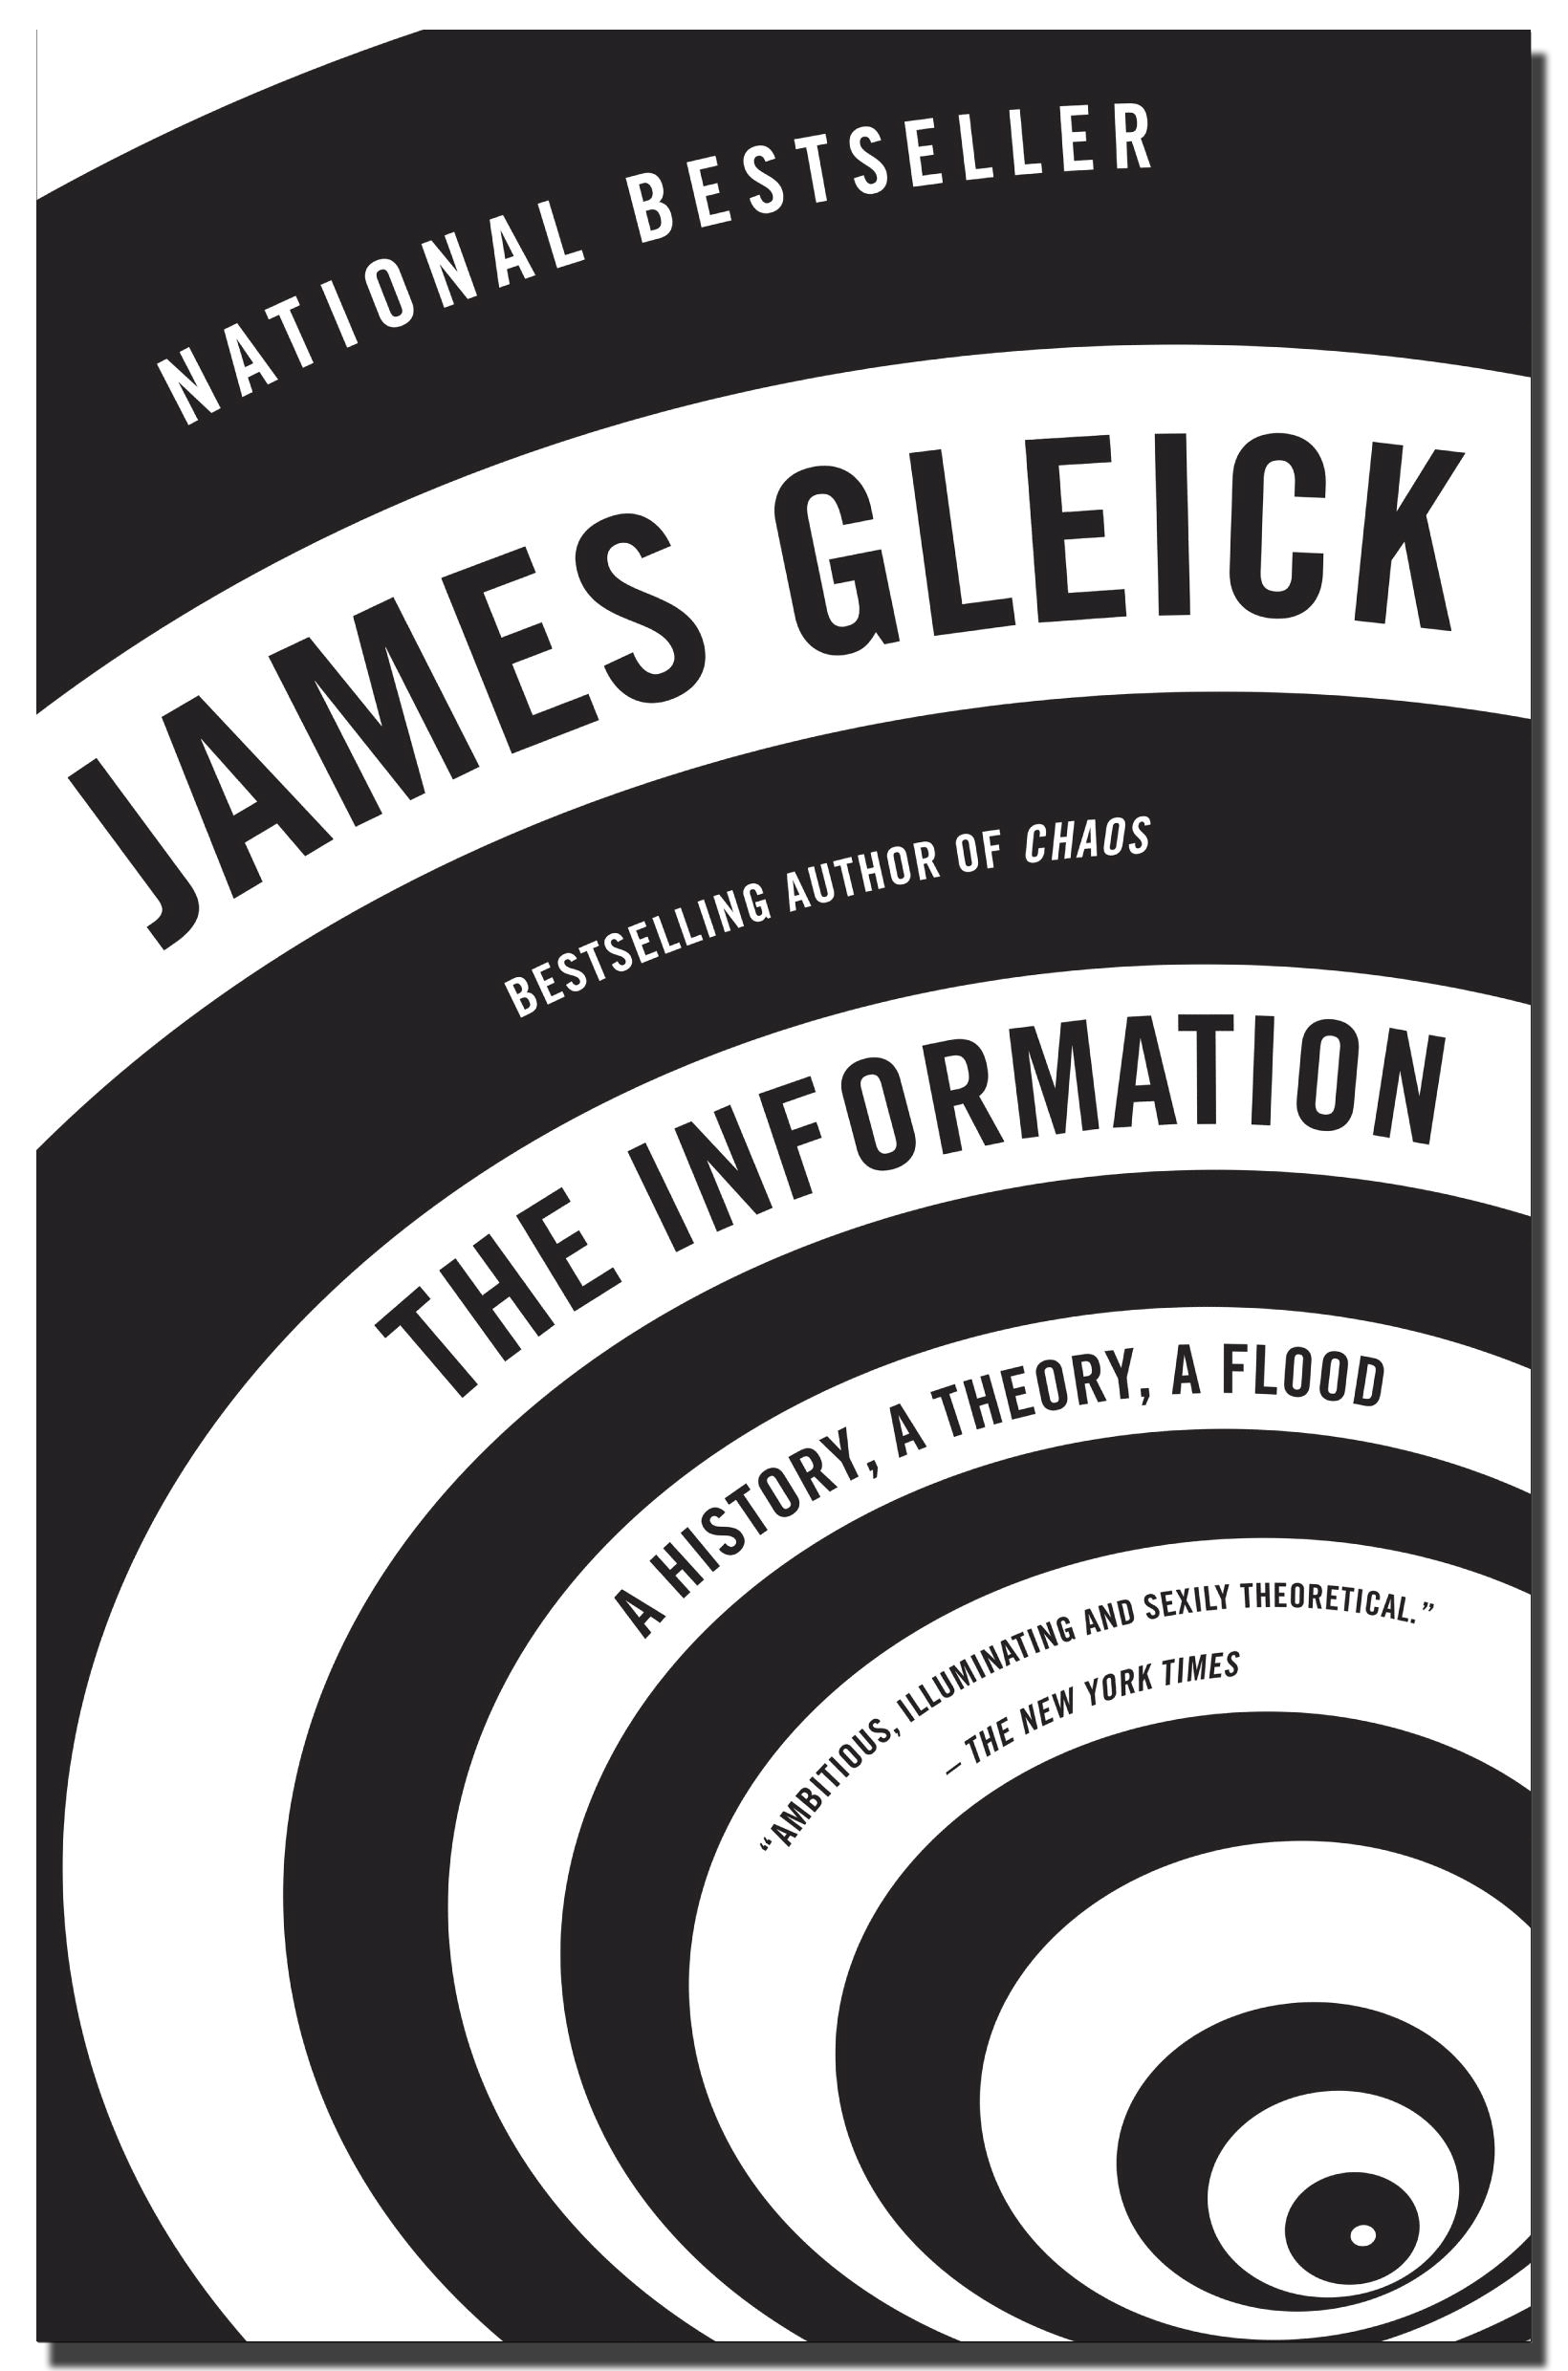

In [4]:
Image('http://around.com/wordpress/wp-content/uploads/US-paperback2.jpg', width=400)

In [5]:
url = 'http://www.ed.ac.uk/schools-departments/informatics/'
HTML('<iframe src="%s" width=800 height=400></iframe>' % url)

# Why use Python for analytics?


> 99% of "BigData" problems can be solved on a desktop.

- `import this`
- scipy stack (numpy, scipy, pandas, scikit-learn, mpl)
- ipython notebook

# Setup

## Linux

- you should know what you're doing with `apt-get`,  `yum` et al.


## OSX

(how I do it)

- use `brew`
- use `virtualenv & virtualenvwrapper`
   - possible to `pip install scipy` (but it takes some time to download and compile all dependencies)
- use [anaconda](https://store.continuum.io/cshop/anaconda/) or [miniconda](http://conda.pydata.org/miniconda.html)
   - default anaconda installation will change your `$PATH` (in `.bashrc`)

## Windows

(sorry, no experience, but you should probably start with
[mysysgit](https://msysgit.github.io))

- use anaconda


<div style="background: #f88; padding: 2em; margin-top: 2em">
<center><span style='font-size: 200%; color: white'>use ipython notebook !</span></center>
</div>


```bash
$ cd to/some/project/
$ ipython notebook

# open browser and go to http://localhost:8888
```

In [6]:
url = 'http://en.m.wikipedia.org/wiki/Literate_programming'
HTML('<iframe src="%s" width=800 height=400></iframe>' % url)

## Namespaces are one honking great idea

In [7]:
# python3 is inevitable
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt   # matplotlib == mpl
# import pandas as pd

# notebook "magic"
%matplotlib inline

# Plotting in 1min

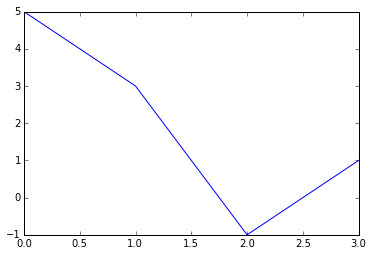

In [8]:
data = [5, 3, -1, 1]
plt.plot(data)

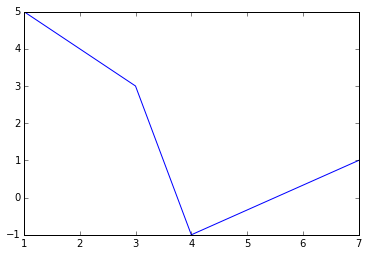

In [9]:
x = [1, 3, 4, 7]
y = [5, 3, -1, 1]

plt.plot(x, y)

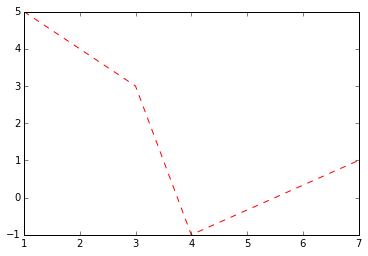

In [10]:
plt.plot(x, y, 'r--')

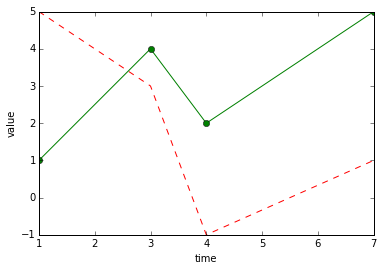

In [11]:
y1 = [5, 3, -1, 1]
y2 = [1, 4, 2, 5]

plt.plot(x, y1, 'r--', x, y2, 'go-')
plt.xlabel('time')
plt.ylabel('value')

## aesthetics

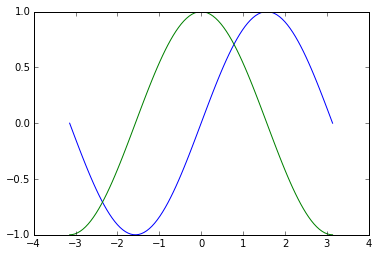

In [12]:
x = np.linspace(-np.pi, np.pi, 100)

plt.plot(x, np.sin(x), x, np.cos(x))

In [13]:
import seaborn as sb
sb.set_style("whitegrid")

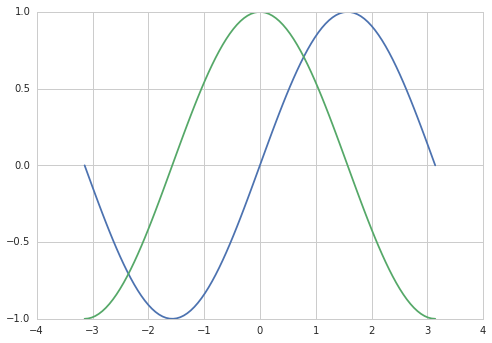

In [14]:
plt.plot(x, np.sin(x), x, np.cos(x))

[seaborn home](http://stanford.edu/~mwaskom/software/seaborn/index.html)

# NumPy

any data == series or collection of series of data points/values/attributes/...

- list vs array
- subscripts
- array oriented programming

## list vs array

In [15]:
# standard python

for i in range(5):
    print(i)

0
1
2
3
4


In [16]:
x = range(5)
print(x)

[0, 1, 2, 3, 4]


In [17]:
# standard python

print(x * 2)

[0, 1, 2, 3, 4, 0, 1, 2, 3, 4]


In [18]:
lst = [1, '2', 'ouch']

print( lst * 2 )

[1, '2', 'ouch', 1, '2', 'ouch']


In [19]:
# cast list to array

x = np.array(range(5))
print(x)
print(x*2)

[0 1 2 3 4]
[0 2 4 6 8]


In [20]:
print( 2*x + 5 )

[ 5  7  9 11 13]


In [21]:
# note the absence of commas

print( np.arange(-2, 3) )

[-2 -1  0  1  2]


## math notation vs programming notation
 

$ f(x) = -3x^2 + 2x -5 $        for $ x \in [-1, 3) $

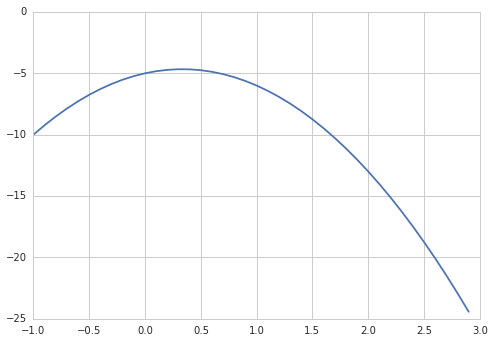

In [22]:
x = np.arange(-1, 3, 0.1)

y = -3 * x**2 + 2 * x - 5

plt.plot(x, y)

# Reading external data

(based on [SW Carpentry python lesson](http://swcarpentry.github.io/python-novice-inflammation/))

> * We are studying inflammation in patients who have been given a new treatment for arthritis.
* The data sets are stored in comma-separated values (CSV) format: each row holds information for a single patient, and the columns represent successive days

In [23]:
# how does the data look like ?

! head -5 data/inflammation-01.csv

0,0,1,3,1,2,4,7,8,3,3,3,10,5,7,4,7,7,12,18,6,13,11,11,7,7,4,6,8,8,4,4,5,7,3,4,2,3,0,0
0,1,2,1,2,1,3,2,2,6,10,11,5,9,4,4,7,16,8,6,18,4,12,5,12,7,11,5,11,3,3,5,4,4,5,5,1,1,0,1
0,1,1,3,3,2,6,2,5,9,5,7,4,5,4,15,5,11,9,10,19,14,12,17,7,12,11,7,4,2,10,5,4,2,2,3,2,2,1,1
0,0,2,0,4,2,2,1,6,7,10,7,9,13,8,8,15,10,10,7,17,4,4,7,6,15,6,4,9,11,3,5,6,3,3,4,2,3,2,1
0,1,1,3,3,1,3,5,2,4,4,7,6,5,3,10,8,10,6,17,9,14,9,7,13,9,12,6,7,7,9,6,3,2,2,4,2,0,1,1


comma, tab (or other character) separated data is very common (csv, tsv, ...)

but remember that is is just "text" data

In [24]:
# standard python

import csv 

fname='data/inflammation-01.csv'

data = []
with open(fname, 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        # convert everything to integer type
        data.append(map(int, row))

print('row 1:', data[0])
print('row 2:', data[1])
print('nb of rows:', len(data) )

row 1: [0, 0, 1, 3, 1, 2, 4, 7, 8, 3, 3, 3, 10, 5, 7, 4, 7, 7, 12, 18, 6, 13, 11, 11, 7, 7, 4, 6, 8, 8, 4, 4, 5, 7, 3, 4, 2, 3, 0, 0]
row 2: [0, 1, 2, 1, 2, 1, 3, 2, 2, 6, 10, 11, 5, 9, 4, 4, 7, 16, 8, 6, 18, 4, 12, 5, 12, 7, 11, 5, 11, 3, 3, 5, 4, 4, 5, 5, 1, 1, 0, 1]
nb of rows: 60


In [25]:
# numpy

data = np.loadtxt(fname='data/inflammation-01.csv', delimiter=',')
print( data )

[[ 0.  0.  1. ...,  3.  0.  0.]
 [ 0.  1.  2. ...,  1.  0.  1.]
 [ 0.  1.  1. ...,  2.  1.  1.]
 ..., 
 [ 0.  1.  1. ...,  1.  1.  1.]
 [ 0.  0.  0. ...,  0.  2.  0.]
 [ 0.  0.  1. ...,  1.  1.  0.]]


In [26]:
print( 'lengh:', len(data) )
print( 'type:', type(data) )

print()

print( 'shape:', data.shape )
print( 'size:', data.size )

lengh: 60
type: <type 'numpy.ndarray'>

shape: (60, 40)
size: 2400


In [27]:
# subscripts

print( data[1][2], data[-1][-1] )  # standard python
print( data[1, 2], data[-1, -1] )  # numpy

2.0 0.0
2.0 0.0


In [28]:
# slicing
# look at the first 5 patients from day 8 for 5 days

print( data[0:5, 7:7+5] )

[[  7.   8.   3.   3.   3.]
 [  2.   2.   6.  10.  11.]
 [  2.   5.   9.   5.   7.]
 [  1.   6.   7.  10.   7.]
 [  5.   2.   4.   4.   7.]]


# NumPy functions

In [29]:
# standard python

z = [2, 3, -4, 11]
z_min = min(z)

print( 'single list:', z_min )


z = [ [1, 2], [-1, 3], [10, 0] ]
z_min = min(z)

print( 'double list:', z_min )

single list: -4
double list: [-1, 3]


In [30]:
def super_min(a_list):
    _min = None
    for item in a_list:
        if hasattr(item, '__iter__'):
            item_min = super_min(item)
            if _min is None:
                _min = item_min
            if item_min < _min:
                _min = item_min
        else:
            if _min is None:
                _min = item
            if item < _min:
                _min = item
    return _min


z = [2, 3, -4, 11]
assert super_min(z) == -4

z = [ [ 1, 2], [-1, 3], [10, 0] ]
assert super_min(z) == -1

In [31]:
# numpy

print( 'min/max:', np.min(data), np.max(data) )

print( 'min/max:', data.min(), data.max() )

min/max: 0.0 20.0
min/max: 0.0 20.0


In [32]:
# standard data properties

print( 'overall  mean(std): %.2f (%.2f) ' % (data.mean(), data.std()) ) 

a_pat = data[4]
print( 'patient5 mean(std): %.2f (%.2f) ' % (a_pat.mean(), a_pat.std()) ) 

a_day = data[:, 4]
print( 'day5     mean(std): %.2f (%.2f) ' % (a_day.mean(), a_day.std()) )

overall  mean(std): 6.15 (4.61) 
patient5 mean(std): 5.55 (4.06) 
day5     mean(std): 2.43 (1.13) 


In [33]:
for day in range(5, 10):
    print( 'mean for day %d: %.2f' %(day, np.mean(data[:, day])) )

mean for day 5: 3.15
mean for day 6: 3.80
mean for day 7: 3.88
mean for day 8: 5.23
mean for day 9: 5.52


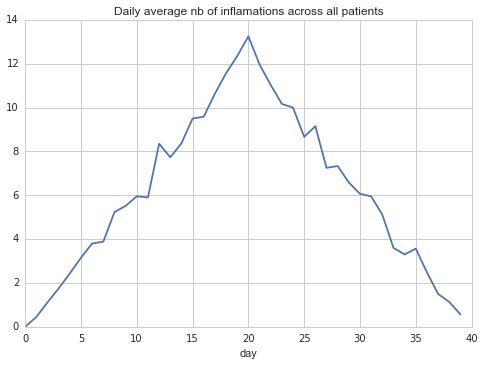

In [34]:
plt.plot( data.mean(axis=0) )

plt.xlabel('day')
plt.title('Daily average nb of inflamations across all patients')

<matplotlib.colorbar.Colorbar instance at 0x10d5a7638>

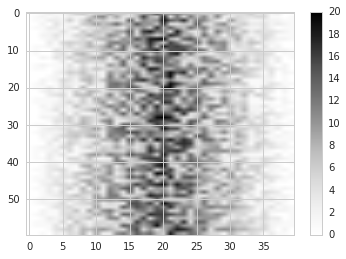

In [35]:
plt.figure(figsize=(6,4))

plt.imshow(data, aspect='auto')
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10e0755f0>

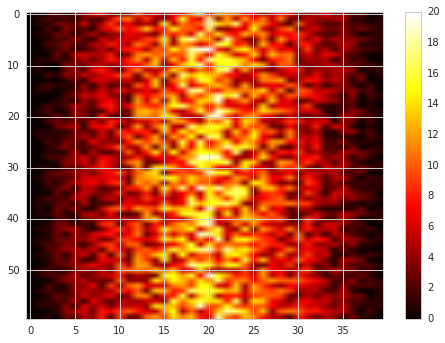

In [36]:
plt.imshow(data, aspect='auto', cmap=plt.get_cmap('hot'))
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x10e30c098>

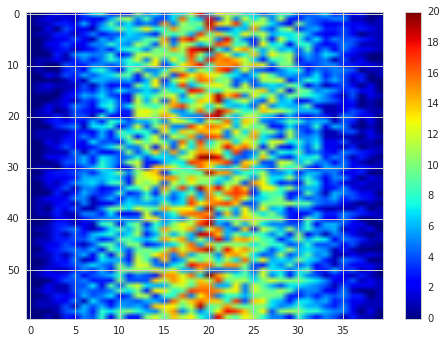

In [37]:
plt.imshow(data, aspect='auto', cmap=plt.get_cmap('jet'))
plt.colorbar()

[matplotlib colormaps](http://matplotlib.org/examples/color/colormaps_reference.html)

# Data generation

In [38]:
# 100 coin flips
# 0 = tail, 1 = head

n_coins = 250
flips = np.random.random_integers(0, 1, n_coins)

print(flips[:10])

[0 0 0 0 1 1 0 1 0 0]


In [39]:
n_heads = np.sum(flips)

print('Number of heads: %d' % n_heads )
print('Prob head: %.2f%%' % (1.0 * n_heads/n_coins * 100))

Number of heads: 122
Prob head: 48.80%


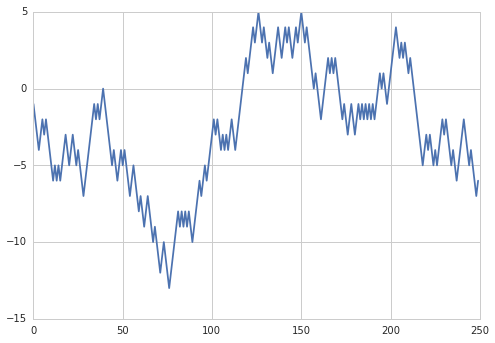

In [40]:
# random walk

# convert flips to +1, -1 steps
walk = flips*2 - 1

plt.plot(np.cumsum(walk))

In [41]:
# generate a list of random numbers between 0 and 1
x = np.random.rand(5)
print('uniform distribution:', x)

# generate a list of random numbers from normal gaussian
x = np.random.randn(5)
print('normal distribution:', x)


uniform distribution: [ 0.45218652  0.41010443  0.85035946  0.79524919  0.67215809]
normal distribution: [ 1.21232575 -0.66093117 -2.49238718 -0.50472713 -0.25280582]


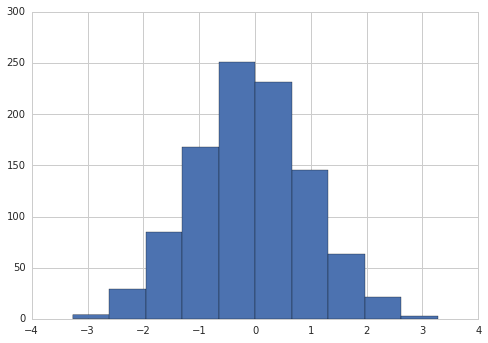

In [42]:
plt.hist(np.random.randn(1000));

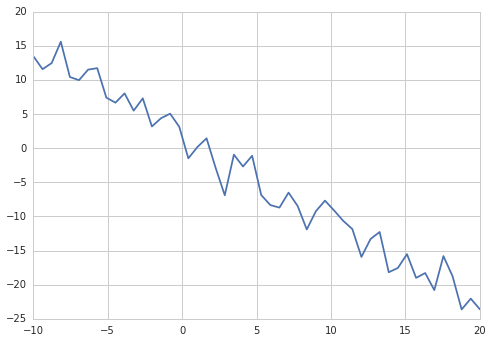

In [43]:
# simulation of a linear process
# y = ax + b

n_pts = 50
x = np.linspace(-10, 20, n_pts)

err = np.random.randn(n_pts) * 2

y = ( -1.3 * x + 2 ) + err

plt.plot(x, y)

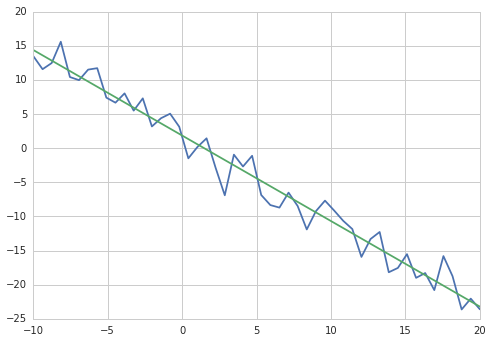

In [44]:
a, b = np.polyfit(x, y, 1)

y_fit = np.polyval((a,b), x)

plt.plot(x, y, x, y_fit)

In [45]:
print(a, b)

-1.25367633006 1.86183541049


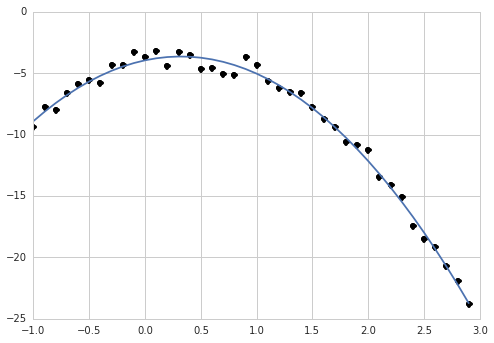

In [46]:
# quadratic process
# y = ax^2 + bx + c

x = np.arange(-1, 3, 0.1)
y = -3 * x**2 + 2 * x - 5 + np.random.rand(len(x)) * 2

# fit
a, b, c = np.polyfit(x, y, 2)
y_fit = np.polyval((a, b, c), x)


plt.plot(x, y, 'ko')
plt.plot(x, y_fit)

# Pandas

<img style="width: 100%; height: auto" src="http://upload.wikimedia.org/wikipedia/commons/7/73/Table_saw_cutting_wood_at_an_angle,_by_BarelyFitz.jpg" />

In [47]:
import pandas as pd

In [48]:
!head -n 5 data/players_dat.csv

date,user,gender,age,country,score,cash
2013-01-01,Abdul,M,20,FR,5,73.84
2013-01-04,Earle,M,36,SG,8,51.13
2013-01-05,Tyron,M,40,US,3,57.15
2013-01-08,Chris,M,24,FR,6,65.63


In [49]:
# read from csv and save as DataFrame
df = pd.read_csv('data/players_dat.csv')
df.head(5)

,date,user,gender,age,country,score,cash
0,2013-01-01,Abdul,M,20,FR,5,73.84
1,2013-01-04,Earle,M,36,SG,8,51.13
2,2013-01-05,Tyron,M,40,US,3,57.15
3,2013-01-08,Chris,M,24,FR,6,65.63
4,2013-01-09,Mark,M,24,FR,2,90.51


In [50]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [51]:
df.tail(3)

,date,user,gender,age,country,score,cash
27,2013-03-20,Charlene,F,28,US,9,80.04
28,2013-03-24,Charlene,F,39,US,7,59.10
29,2013-03-30,Abdul,M,44,FR,8,89.19


In [52]:
# sort on scores in descending order

df.sort('score', ascending=0).head(5)

,date,user,gender,age,country,score,cash
27,2013-03-20,Charlene,F,28,US,9,80.04
29,2013-03-30,Abdul,M,44,FR,8,89.19
8,2013-01-18,Wei,F,43,US,8,74.80
1,2013-01-04,Earle,M,36,SG,8,51.13
13,2013-02-03,May,F,24,US,7,22.13


In [53]:
# access like dict
a_column = df['cash']

print(type(a_column))

<class 'pandas.core.series.Series'>


In [54]:
# access as object attribte

print( np.sum(a_column - df.cash) )

0.0


In [55]:
# get the underlying numpy array
print( type(df.cash.values) )

<type 'numpy.ndarray'>


In [56]:
df.cash.mean()

66.385999999999996

In [57]:
df.describe()

,age,score,cash
count,30.000000,30.000000,30.000000
mean,31.800000,4.333333,66.386000
std,8.515301,2.509751,21.023171
min,20.000000,1.000000,22.130000
25%,24.000000,2.000000,52.145000
50%,33.500000,4.000000,64.200000
75%,39.750000,6.750000,86.902500
max,44.000000,9.000000,99.400000


In [58]:
selection = df['gender'] == 'F'
df[ selection ]

,date,user,gender,age,country,score,cash
5,2013-01-12,May,F,28,US,3,46.32
6,2013-01-13,Charlene,F,43,US,3,27.27
7,2013-01-17,Ada,F,23,US,4,89.23
8,2013-01-18,Wei,F,43,US,8,74.80
10,2013-01-25,Charlene,F,40,FR,5,96.06
12,2013-01-31,Ada,F,28,FR,1,37.27
13,2013-02-03,May,F,24,US,7,22.13
15,2013-02-19,May,F,38,SG,5,94.37
18,2013-02-24,May,F,42,FR,7,67.07
21,2013-02-28,Ada,F,39,FR,2,46.09


In [59]:
df[ selection ][ df.country == 'SG']

/Users/ivan/local/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1808: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,date,user,gender,age,country,score,cash
15,2013-02-19,May,F,38,SG,5,94.37
24,2013-03-10,Wei,F,21,SG,1,93.19


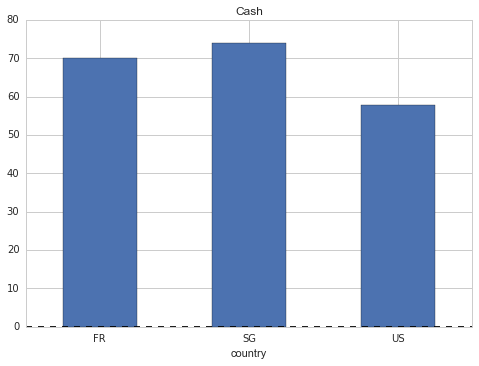

In [60]:
df.groupby(['country']).cash.mean().plot(kind='bar', title="Cash", rot=0)